# 1 Máquina desregulada?
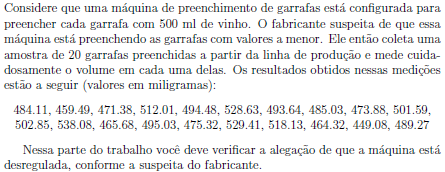


## i)  
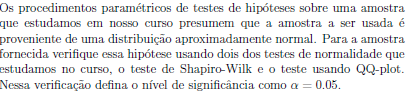

[1] "A hipótese nula pode NÃO ser rejeitada"

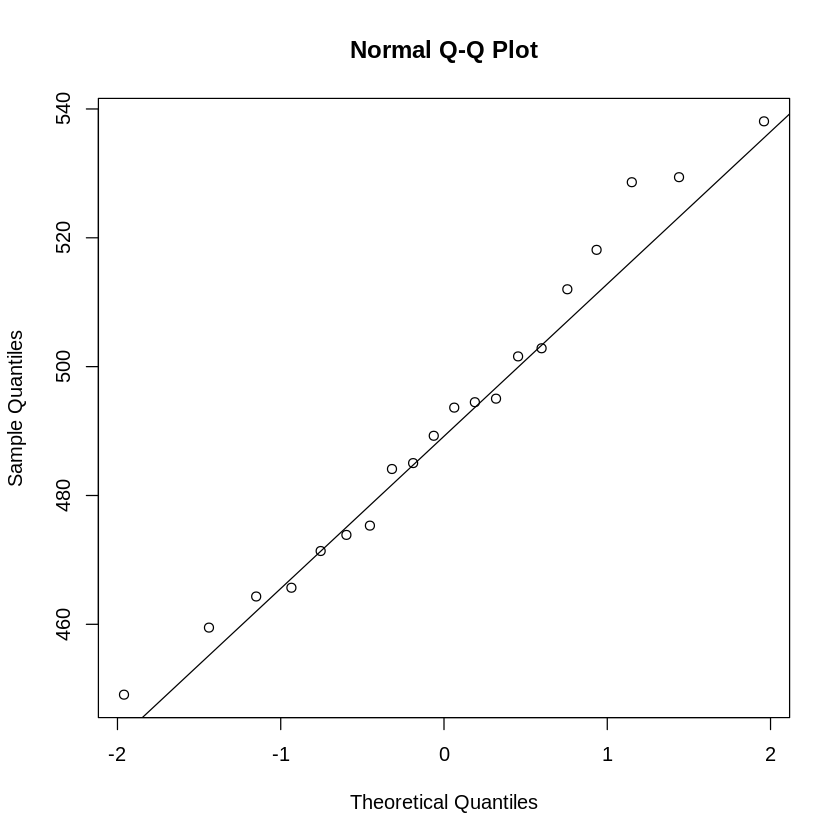

In [ ]:
library(tidyverse)

alpha <- 0.05
wine <- c(484.11, 459.49, 471.38, 512.01, 494.48, 528.63, 493.64, 485.03, 473.88, 501.59,
  502.85, 538.08, 465.68, 495.03, 475.32, 529.41, 518.13, 464.32, 449.08, 489.27)

wine_shapiro_test <- shapiro.test(wine)

ifelse(wine_shapiro_test$p.value > alpha, "A hipótese nula pode NÃO ser rejeitada",
                                          "A hipótese nula pode ser rejeitada")
qqnorm(wine)
qqline(wine)

Primeiro foi definido o nível de significância, depois foi criado o vetor contendo os ml dos vinho, após isso é realizado um teste de normalidade de Shapiro-Wilk nos dados. Então é utilizado um ifelse para printar o se a hipotese pode ser rejeitada ou não conforme o p.value encontrado no teste.

Então é feito um gráfico Q-Q para visualizar a normalidade dos dados.

## ii)
image.png

H0: μ = 500

H1: μ < 500

## iii)
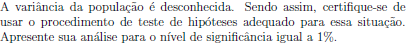

In [ ]:
wine_t_test <- t.test(wine, mu = 500)

ifelse(wine_t_test$p.value > 0.01, "Não rejeitar a hipótese nula: Não há evidências estatísticas para afirmar que a máquina está preenchendo as garrafas com volume médio significativamente menor que 500 ml.",
       "Rejeitar a hipótese nula: A máquina está preenchendo as garrafas com volume médio significativamente menor que 500 ml.")

[1] "Não rejeitar a hipótese nula: Não há evidências estatísticas para afirmar que a máquina está preenchendo as garrafas com volume médio significativamente menor que 500 ml."

Está sendo realizado um teste t, já que a variância da população é desconhecida, com o objetivo de verificar se a máquina está preenchendo as garrafas com um volume médio significativamente menor que 500 ml. E utilizado a função t.test que recebe os seguintes parâmetros, o dado que será realizado o teste e a média da hipótese nula.

## 2 Um Estilo diferente ajuda?
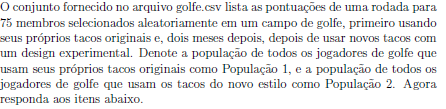

## i)
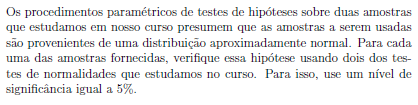

In [ ]:
library(readxl)
library(moments)

golfe <- read_excel("golfe.xls")
alpha <- 0.05

golfe_old_agostino <- agostino.test(golfe$Old_Score)
golfe_new_agostino <- agostino.test(golfe$New_Score)
golfe_old_shapiro <- shapiro.test(golfe$Old_Score)
golfe_new_shapiro <- shapiro.test(golfe$New_Score)

resultados <- list(
  Old_Agostino = c(Resultado = ifelse(golfe_old_agostino$p.value > alpha, "Não rejeitar H0", "Rejeitar H0"), P_Value = golfe_old_agostino$p.value),
  New_Agostino = c(Resultado = ifelse(golfe_new_agostino$p.value > alpha, "Não rejeitar H0", "Rejeitar H0"), P_Value = golfe_new_agostino$p.value),
  Old_Shapiro = c(Resultado = ifelse(golfe_old_shapiro$p.value > alpha, "Não rejeitar H0", "Rejeitar H0"), P_Value = golfe_old_shapiro$p.value),
  New_Shapiro = c(Resultado = ifelse(golfe_new_shapiro$p.value > alpha, "Não rejeitar H0", "Rejeitar H0"), P_Value = golfe_new_shapiro$p.value)
)

resultados


$Old_Agostino
             Resultado                P_Value 
         "Rejeitar H0" "3.94294711360338e-05" 

$New_Agostino
             Resultado                P_Value 
         "Rejeitar H0" "0.000638191620496007" 

$Old_Shapiro
             Resultado                P_Value 
         "Rejeitar H0" "2.26762969870702e-05" 

$New_Shapiro
             Resultado                P_Value 
         "Rejeitar H0" "0.000138904079343636"

Primeiramente é utilizado a função read_excel que lê dados de um arquivo "golfe.xls" e após isso é utilizado as funções agostino.test e shapiro.test que são responsáveis por realizarem testes estatísticos Agostino e Shapiro em duas variáveis ("Old_Score" e "New_Score"). Os resultados desses testes são armazenados em um lista chamada de resultados, que contem a interpretação do p.value em relação ao nível de significância e o próprio valor de p.

## ii)
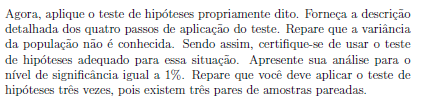

In [ ]:
golfe_t_test<- t.test(golfe$Old_Score, golfe$New_Score, paired = TRUE)
alpha <- 0.01
ifelse(golfe_t_test$p.value > alpha, "Não rejeitar a hipótese nula: Não há evidências estatísticas para afirmar.",
       "Rejeitar a hipótese nula: Há uma diferença significativa nas pontuações dos jogadores.")

[1] "Rejeitar a hipótese nula: Há uma diferença significativa nas pontuações dos jogadores."

Primeiramente, é preciso definir a hipótese nula e alternativa (H0 e H1), Nesse caso é para verificar se há um diferença de performance entra a amostra old_score e new_score.

Agora foi utilizado o t.test novamente, já que não temos a variância então não será possível utilizar o z.test, nesse caso como as amostras são pareadas é necessário colocar como argumento as duas amostras e o argumento paired = TRUE, que significa que elas são pareadas.

Após isso, é feito o teste para saber se é rejeitado essa hipótese ou não.

# 3) Transmissões: automática versus manual
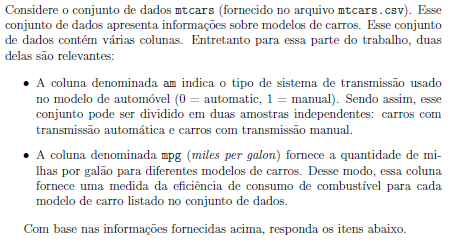


## i)
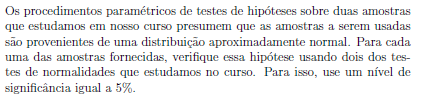

In [ ]:
alpha <- 0.05
mtcars_automatico <- mtcars %>% filter(am == 0)

mtcars_manual <- mtcars %>% filter(am == 1)

carro_aut_agostino <- agostino.test(mtcars_automatico$mpg)
carro_man_agostino <- agostino.test(mtcars_manual$mpg)
carro_aut_shapiro <- shapiro.test(mtcars_automatico$mpg)
carro_man_shapiro <- shapiro.test(mtcars_manual$mpg)

resultados <- list(
  aut_Agostino = c(Resultado = ifelse(carro_aut_agostino$p.value > alpha, "Não rejeitar H0", "Rejeitar H0"), P_Value = carro_aut_agostino$p.value),
  man_Agostino = c(Resultado = ifelse(carro_man_agostino$p.value > alpha, "Não rejeitar H0", "Rejeitar H0"), P_Value = carro_man_agostino$p.value),
  aut_Shapiro = c(Resultado = ifelse(carro_aut_shapiro$p.value > alpha, "Não rejeitar H0", "Rejeitar H0"), P_Value = carro_aut_shapiro$p.value),
  man_Shapiro = c(Resultado = ifelse(carro_man_shapiro$p.value > alpha, "Não rejeitar H0", "Rejeitar H0"), P_Value = carro_man_shapiro$p.value)
)
resultados

Foi importado a base da dados mtcars, mas como já é presente no r, não foi preciso fazer nenhum comando para isso.
Após isso foi preciso filtrar os carros automáticos e manuais, assim criando uma tabela com a informação dos carros manuais e automáticos.

Então, foi feito o agostino.test e shapiro.test nas duas bases de dados em relação á variável mpg(miles per galon).
E para finalizar foi feito a testagem em relação ao nível de significância.

## ii)
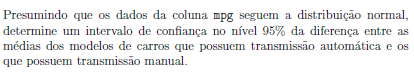

In [ ]:
confidence_interval <- function(vector, interval) {
  x_bar = vector
  s = abs(sd(mtcars_automatico$mpg) - sd(mtcars_manual$mpg))
  desvp_bar = s / sqrt(nrow(mtcars))
  z_score <- abs(qnorm((1 - interval)/2))
  error <- desvp_bar * z_score
  result <- c("lower" = x_bar - error, "upper" = x_bar + error)
  return(result)
}

confidence_interval(abs(mean(mtcars_automatico$mpg) - mean(mtcars_manual$mpg)), 0.95)

lower    upper 
6.436771 8.053107

Foi criado uma função que recebe dois parâmetros, o módulo da diferença entre a média dos modelos de carros e o nível de confiança utilizado. Nesse caso, será feito com 95%. É feito da seguinte forma:

2. Calculado a diferença dos desvios padrões das amostras.
3.  Calculado o desvio padrão da media da amostra, que é feito através da seguinte fórmula: s / sqrt(length(n)); nesse caso o N é conseguido pela função nrow
4.   Calcular o z_score, é utilizado o qnorm para encontrar o valor que corresponde a probabilidade de (1 - o intervalo de confiança)/2; e dentro disso tudo é utilizado o abs para garantir que o número será positivo
5. Calcular o erro, que é desvp_bar * z_score
6. Com isso é só somar e diminuir a média ao erro que será encontrado o limite superior e inferior desse intervalo de confiança.




## iii
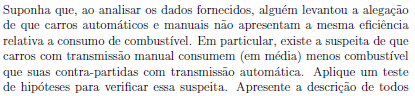 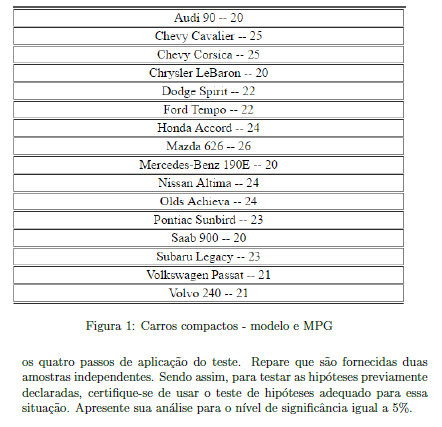

In [ ]:
carros_t_test<- t.test(mtcars_automatico$mpg,mtcars_manual$mpg, paired = FALSE)
alpha <- 0.05
ifelse(carros_t_test$p.value > alpha, " não é possível rejeitar a hipótese nula. Em outras palavras, não há evidência para afirmar",
       "há evidência para rejeitar a hipótese nula.")

[1] "há evidência para rejeitar a hipótese nula."

Como essas amostras são independentes, é preciso utilizar o t.test, mas agora é preciso colocar o argumento paired = FALSE, com isso o teste será tratado sobre 2 amostras independentes. Após isso é preciso testar o p.value desse teste em relação ao nível de significância, para saber se tem evidência ou não para rejeitar a hipótese nula


# 4 Teste ANOVA

## 4.1 Situação-problema I
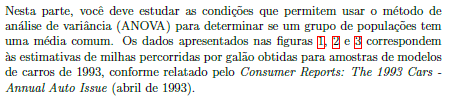

## i
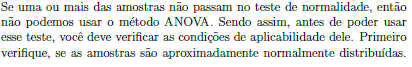
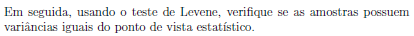

In [ ]:
library(car)
mpg_compactos <- c(20, 25, 25, 20, 22, 22, 24, 26, 20, 24, 24, 23, 20, 23, 21, 21)
mpg_medios <- c(18, 19, 22, 22, 19, 16, 21, 21, 21, 20, 17, 18, 18, 17, 19, 19, 18, 21, 23, 19, 22, 20)
mpg_grandes <- c(19, 16, 16, 17, 20, 20, 20, 18, 18, 19, 19, 15, 18, 17, 15, 18, 17, 18, 18, 17)

realizar_teste_shapiro <- function(x) {
  result <- shapiro.test(x)
  alpha <- 0.05
  return(c(Resultado = ifelse(result$p.value > alpha, "Não rejeitar H0", "Rejeitar H0"), P_Value = result$p.value))
}

resultado_compactos <- realizar_teste_shapiro(mpg_compactos)
resultado_medios <- realizar_teste_shapiro(mpg_medios)
resultado_grandes <- realizar_teste_shapiro(mpg_grandes)

compactos <- data.frame(mpg = mpg_compactos, modelo = "compactos")
medios <- data.frame(mpg = mpg_medios, modelo = "medios")
grandes <- data.frame(mpg = mpg_grandes, modelo = "grandes")

carros <- rbind(compactos, medios, grandes)

carros$modelo <- as.factor(carros$modelo)

leveneTest(carros$mpg, carros$modelo, center = mean)

ERROR: ignored

São criados 3 vetores, contendo os carros compactos, grandes e médios. Após isso é criado uma função para realizar o shapiro.test com todos os vetores.

Então os vetores são transformados em tabelas e depois essas 3 tabelas são combinadas em 1 só com o nome de carros. Para finalizar, a variável modelo é transformada em fator para assim ser possível fazer o teste de igualdade com a função leveneTest, que recebe a variável fator, os valores dela e center = mean já que é isso que estamos calculando.

### ii
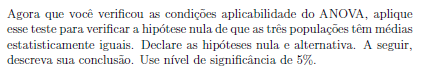

In [ ]:
anova_carro <- aov(mpg ~ modelo, data = carros)

summary(anova_carro)


            Df Sum Sq Mean Sq F value   Pr(>F)    
modelo       2  201.9  100.96   30.64 1.14e-09 ***
Residuals   55  181.2    3.29                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

H0 e H1 afirmam se existem a igualdade ou diferença na diferença da média dos 3 tipos de carros.

Agora é utilizado a função aov para utilizar esse teste, recebe a variável que está tentando prever, mpg, e a variável que influencia essa variável, modelo, e o "~" serve para mostrar essa relação, e por último é preciso passar como argumento o dataframe que foi utilizado.

Para poder vizualizar as informações foi utilizado a função summary que mostra várias informações importântes, entre elas o P.value

## 4.2
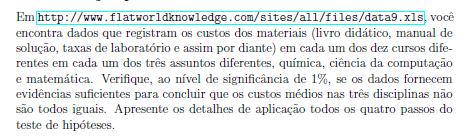

In [43]:
data9 <- read_excel("data9.xls")

matematica <- data9 %>% filter(str_detect(data9$Cource, "MATH"))
matematica$Cource <- "MATH"
Comp <- data9 %>% filter(str_detect(data9$Cource, "COMP"))
Comp$Cource <- "COMP"
Quimica <- data9 %>% filter(str_detect(data9$Cource, "CHEM"))
Quimica$Cource <- "CHEM"

data9 <- bind_rows(matematica, Comp, Quimica)

data9$Cource <- as.factor(data9$Cource)

anova_materias <- aov(Cost ~ Cource, data = data9)

summary(anova_materias)

            Df Sum Sq Mean Sq F value Pr(>F)
Cource       2   6434    3217   1.418   0.26
Residuals   27  61257    2269               

É importado a base de dados data9.xls, com isso foram criadas 3 tabelas com as matérias de matemática, computação e química utilizando a função filter e a str_detect para pegar todos os valores correspondentes a materia da tabela e depois mudar esses nomes para ter uma uniformidade. Após isso, as 3 tabelas foram combinadas em 1 só, e a variável Cource foi transformada em fator, em fim será possível fazer o teste anova.

# 5 Teste Qui-quadrado

## 5.1 Distribuição $\chi^2$
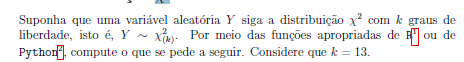

## i
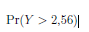

In [6]:
k <- 13
y <- 2.56

prob_i <- 1 - pchisq(y, df = k)
prob_i

[1] 0.9991126

Os parâmetros da distribuição qui-quadrado são o k = 13 e o y = 2.56

```
# prob_i <- 1 - pchisq(y, df = k)
```
Esta linha de código calcula a probabilidade acumulada da distribuição qui-quadrado com k graus de liberdade até um valor y especificado e, em seguida, subtrai esse valor ao 1, 100%.

## ii
image.png

In [ ]:
k <- 13
y1 <- 2.56
y2 <- 4.87

prob_ii <- pchisq(y2, df = k) - pchisq(y1, df = k)
prob_ii


Os parâmetros da distribuição qui-quadrado são o k = 13, y1 = 2.56 e y2 = 4.87

```
# prob_ii <- pchisq(y2, df = k) - pchisq(y1, df = k)
```
Esta linha de código calcula a probabilidade acumulada da distribuição qui-quadrado com k graus de liberdade. A diferença prob_ii é a probabilidade de que uma variável aleatória que segue essa distribuição esteja entre os valores y1 e y2

## iii
image.png

In [8]:
k <- 13
p_value <- 0.95

y_value <- qchisq(p_value, df = k)
y_value


[1] 22.36203

Os parâmetros da distribuição qui-quadrado são o k = 13 e o p_value = 0.95

```
# y_value <- qchisq(p_value, df = k)
```

Esta linha de código calcula a y_value é calculado como o valor de y na distribuição qui-quadrado com k graus de liberdade até o valor de p_value especificado.

# 5.2 Teste $\chi^2$ (situação-problema I)
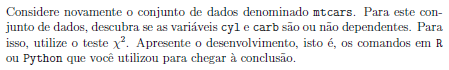


In [5]:
contingency_table <- table(mtcars$cyl, mtcars$carb)

chi_sq_test <- chisq.test(contingency_table)

chi_sq_test

Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  contingency_table
X-squared = 24.389, df = 10, p-value = 0.006632


Carregar a base de dados mtcars, mas já é imbutida no r, então não precisamos carregar. Após isso, é preciso criar uma tabela de contingência entre as variáveis cyl e carb, e então será possível realizar o teste qui-quadrado de independência.

# 5.3 Teste $\chi^2$ (situação-problema II)
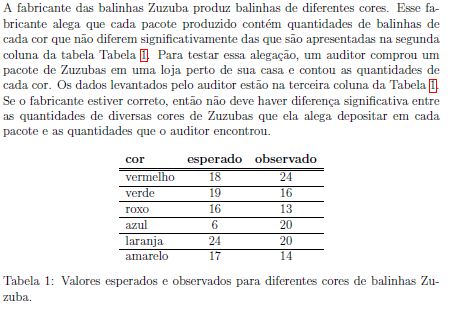

## i
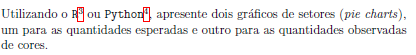

In [ ]:
library(ggplot2)
balinhas_df <- data.frame(
  Cor = c("Vermelho", "Verde", "Roxo", "Azul", "Laranja", "Amarelo"),
  Esperado = c(18, 19, 16, 6, 24, 17),
  Observado = c(24, 16, 13, 20, 20, 14)
)

# Gráfico de setores para as quantidades esperadas
ggplot(data = balinhas_df, aes(x = "", y = Esperado, fill = Cor)) +
  geom_bar(stat = "identity") +
  coord_polar(theta = "y") +
  geom_text(aes(label = Esperado), position = position_stack(vjust = 0.5)) +
  labs(title = "Quantidades Esperadas de Cores",
       fill = "Cores") +
  theme_void()

# Gráfico de setores para as quantidades observadas
ggplot(data = balinhas_df, aes(x = "", y = Observado, fill = Cor)) +
  geom_bar(stat = "identity") +
  coord_polar(theta = "y") +
  geom_text(aes(label = Observado), position = position_stack(vjust = 0.5)) +
  labs(title = "Quantidades Observadas de Cores",
       fill = "Cores") +
  theme_void()

Primeiramente é preciso criar uma tabela contendo as variáveis cor, Esperado e Observado, que contém as cores, e os valores esperados e observados dessas espectivas cores.

Utilizando um gráfico ggplot, as variáveis Esperado e Observado são mapeadas para os eixos y, respectivamente. O eixo x é deixado em branco, pois não é necessário para um gráfico de barras polares.
A segunda linha `geom_bar(stat = "identity")` adiciona barras ao gráfico, utilizando os valores da coluna Esperado como alturas.
A terceira linha `coord_polar(theta = "y")` define o sistema de coordenadas polares para o gráfico.
A quarta linha `geom_text(aes(label = Esperado), position = position_stack(vjust = 0.5))` adiciona rótulos às barras, utilizando os valores da coluna Esperado. Os rótulos são posicionados verticalmente, com o centro de cada rótulo alinhado com o meio da barra correspondente.
A quinta linha `labs(title = "Quantidades Esperadas de Cores", fill = "Cores")` adiciona um título e uma legenda ao gráfico.
A sexta linha `theme_void()` aplica um tema minimalista ao gráfico.

## ii
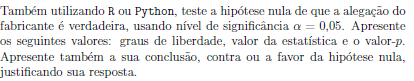

In [19]:
chi_sq_test <- chisq.test(balinhas_df$Observado, balinhas_df$Esperado)

graus_de_liberdade <- chi_sq_test$parameter

estatistica_chi_sq <- chi_sq_test$statistic

valor_p <- chi_sq_test$p.value

print(graus_de_liberdade)
print(estatistica_chi_sq)
print(valor_p)

Warning message in chisq.test(balinhas_df$Observado, balinhas_df$Esperado):
“Chi-squared approximation may be incorrect”


df 
20 
X-squared 
       24 
[1] 0.2423922


Primeiro é utilizado a função chisq.test tendo como parâmetro as variáveis observado e esperado.

Depois disso é só utilizar o "$" para pegar os valores de graus de liberdade, o valor da estatiística e o valor-p

# 5.4 Teste $\chi^2$ (situação-problema III)
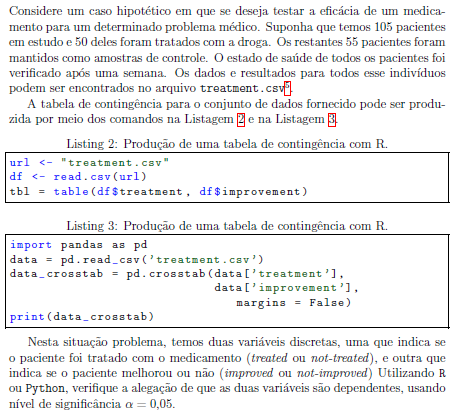

In [23]:
df <- read.csv("treatment.csv")
alpha <- 0.05
# Crie a tabela de contingência
tbl <- table(df$treatment, df$improvement)

# Realize o teste qui-quadrado de independência
chi_sq_test <- chisq.test(tbl)

# Obtenha os graus de liberdade
graus_de_liberdade <- chi_sq_test$parameter

# Obtenha o valor-p
valor_p <- chi_sq_test$p.value

ifelse(valor_p < alpha, "São dependentes", "São independentes")


[1] "São dependentes"

Após produzir a tabela de contingência é necessário realizar o teste qui-quadrado de independência, e é feito utilizando a função chisq.test. Depois disso é só utilizar o "$" para pegar os valores de graus de liberdade e o valor-p.

# 5.5 Teste $\chi^2$ (situação-problema IV)

In [32]:
library(readxl)
alpha <- 0.10
data4 <- read_excel("data4.xls")

# Frequências observadas
observed_frequencies <- table(data4$`Die Result`)

# Frequências esperadas (1/6 da quantidade total de arremessos)
expected_frequency <- length(data4$`Die Result`) / 6
expected_frequencies <- rep(expected_frequency, 6)

# Teste qui-quadrado de aderência
chi2_result <- chisq.test(observed_frequencies, p = expected_frequencies/500)

# Obter o valor-p
p_value <- chi2_result$p.value

print(p_value)

ifelse(p_value < alpha, "O dado não é justo", "O dado é justo")


[1] 0.7086192


[1] "O dado é justo"

Foi lido o excel "data4.xls", depois foi criado uma tabela de contigência dos resultados obtidos nos dados, após isso foi calculada as frequências esperadas e depois replicada 6 vezes com a função rep.

Então foi feito um teste qui-quadrado de aderência tendo como parâmetro a tabela de contigência e as frequências esperadas/500, já que dividir por 500 é equivalente a calcular o qui-quadrado por grau de liberdade.

